In [22]:
tactic_map = {
    "TA0043": "Reconnaissance",
    "TA0042": "Resource Development",
    "TA0001": "Initial Access",
    "TA0002": "Execution",
    "TA0003": "Persistence",
    "TA0004": "Privilege Escalation",
    "TA0005": "Defense Evasion",
    "TA0006": "Credential Access",
    "TA0007": "Discovery",
    "TA0008": "Lateral Movement",
    "TA0009": "Collection",
    "TA0011": "Command and Control",
    "TA0010": "Exfiltration",
    "TA0040": "Impact"
}

casual_model_graph = {
    "TA0043": ["TA0042"],
    "TA0042": ["TA0001"],
    "TA0001": ["TA0002", "TA0003"],
    "TA0002": ["TA0003", "TA0004", "TA0005", "TA0006", "TA0007", "TA0008", "TA0009", "TA0011"],
    "TA0003": ["TA0004", "TA0005", "TA0006", "TA0007", "TA0008", "TA0009", "TA0011"],
    "TA0004": ["TA0005", "TA0006", "TA0007", "TA0008", "TA0009", "TA0011"],
    "TA0005": ["TA0006", "TA0007", "TA0008", "TA0009", "TA0011"],
    "TA0006": ["TA0007", "TA0008", "TA0009", "TA0011"],
    "TA0007": ["TA0008", "TA0009", "TA0011"],
    "TA0008": ["TA0009", "TA0011"],
    "TA0009": ["TA0011"],
    "TA0011": ["TA0010", "TA0040","TA0002"],
    "TA0010": ["TA0040"],
    "TA0040": ["TA0043"]
}
sum = 0 
for item in casual_model_graph.values():
    sum += len(item)

print(sum)


45


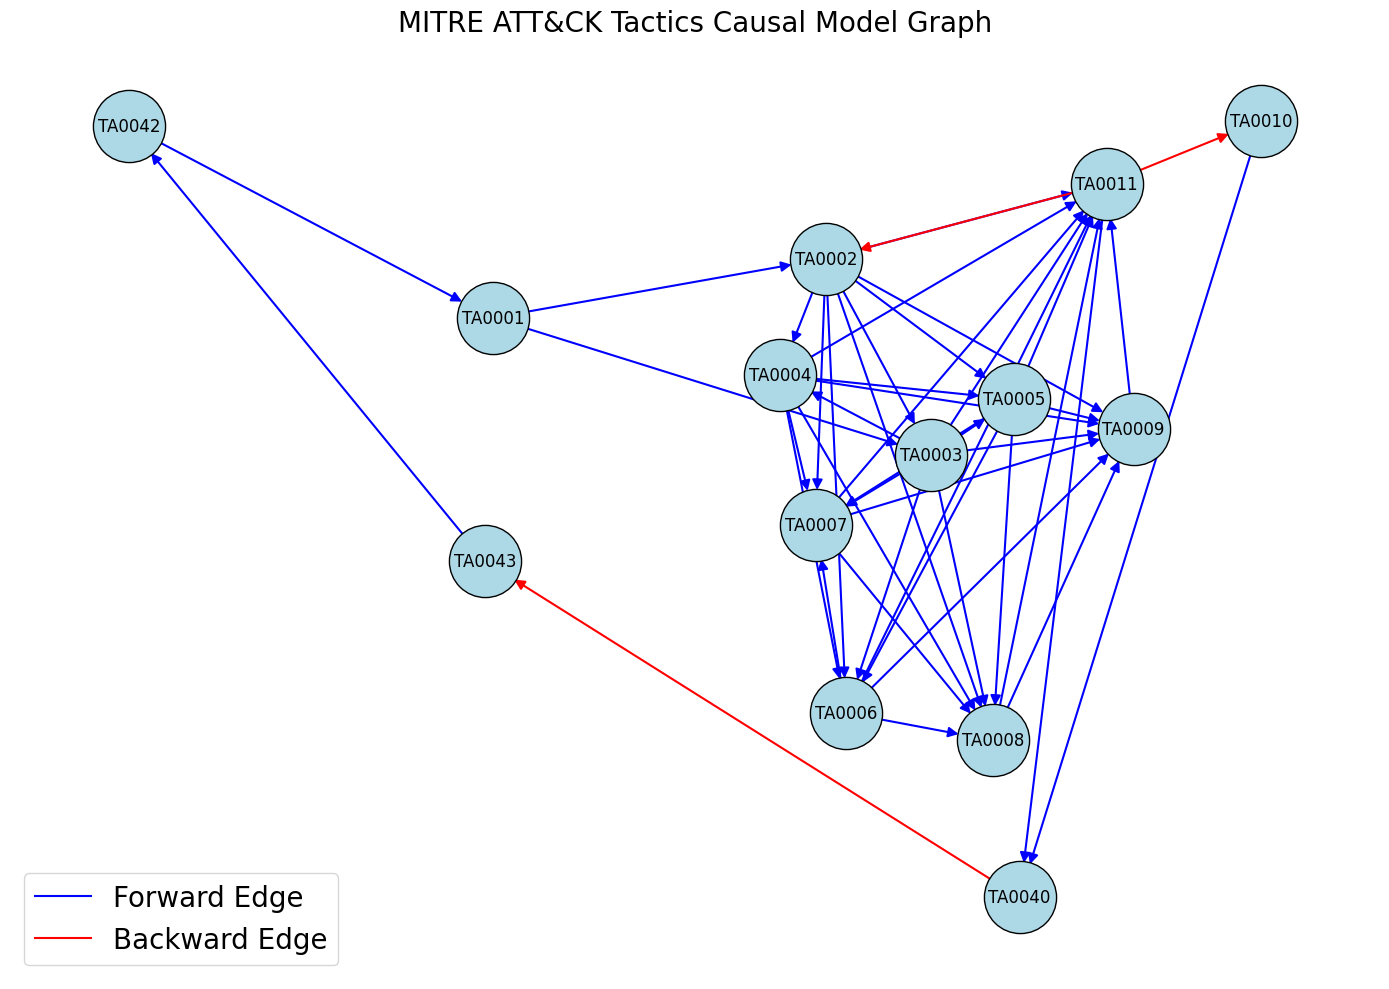

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建有向图
G = nx.DiGraph()

# 添加节点
for tactic_id, tactic_name in tactic_map.items():
    G.add_node(tactic_id)

# 添加边
forward_edges = []
backward_edges = []

for source, targets in casual_model_graph.items():
    for target in targets:
        # 识别正向和反向边
        if int(source[2:]) < int(target[2:]) or source == "TA0042" or source == "TA0043":
            if source != "TA0040":
                forward_edges.append((source, target))
            else:
                backward_edges.append((source, target))
        else:
            backward_edges.append((source, target))

# 将所有边添加到图中
G.add_edges_from(forward_edges + backward_edges)

# 绘制图形
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)  # 一致的布局

# 绘制带边框的节点
nx.draw_networkx_nodes(G, pos, node_size=2700, node_color="lightblue", 
                      edgecolors="black")

# 绘制节点标签（只显示ID）
nx.draw_networkx_labels(G, pos, labels={n: n for n in G.nodes()})

# 绘制蓝色正向边
nx.draw_networkx_edges(G, pos, edgelist=forward_edges, edge_color="blue", 
                      arrows=True, arrowsize=15, width=1.5,
                      min_source_margin=20, min_target_margin=25)

# 绘制红色反向边
nx.draw_networkx_edges(G, pos, edgelist=backward_edges, edge_color="red", 
                      arrows=True, arrowsize=15, width=1.5,
                      min_source_margin=20, min_target_margin=25)

# 添加图例
plt.plot([], [], color='blue', label='Forward Edge')
plt.plot([], [], color='red', label='Backward Edge')
plt.legend(fontsize=20,loc='lower left')

plt.title("MITRE ATT&CK Tactics Causal Model Graph",fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.show()